In [1]:
# toc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML contents
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# from sklearn.tree import plot_tree

from IPython.display import Markdown

plt.style.use(f'../maroon_ipynb.mplstyle')

def display_table(df, index=False):
    markdown_str = df.to_markdown(index=index)
    display(Markdown(markdown_str))

# Problem 1
The included csv file contains information about the naturally occurring elements. The goal of this homework is to build a random forest model to predict the melting point of an element based on the other provided properties.

Split the database by setting aside 10% for testing and train a random forest model on the other 90% to predict the melting temperature. What is the root mean squared error of the model on the training dataset and the test dataset respectively? What inputs were most important for determining the melting point? Does this make physical sense?

## Solution

In [2]:
# Getting the data
data = pd.read_csv('periodic_table_data.csv')
# data.head()
display_table(data.head().transpose(), index=True)

|                   |         0 |          1 |         2 |         3 |        4 |
|:------------------|----------:|-----------:|----------:|----------:|---------:|
| AtomicNumber      |  1        |   2        |    3      |    4      |    5     |
| AtomicMass        |  1.007    |   4.002    |    6.941  |    9.012  |   10.811 |
| Period            |  1        |   1        |    2      |    2      |    2     |
| Group             |  1        |  18        |    1      |    2      |   13     |
| AtomicRadius      |  0.79     |   0.49     |    2.1    |    1.4    |    1.2   |
| Electronegativity |  2.2      | nan        |    0.98   |    1.57   |    2.04  |
| FirstIonization   | 13.5984   |  24.5874   |    5.3917 |    9.3227 |    8.298 |
| Density           |  8.99e-05 |   0.000179 |    0.534  |    1.85   |    2.34  |
| MeltingPoint      | 14.175    |   0.95     |  453.85   | 1560.15   | 2573.15  |
| BoilingPoint      | 20.28     |   4.22     | 1615      | 2742      | 4200     |
| SpecificHeat      | 14.304    |   5.193    |    3.582  |    1.825  |    1.026 |
| NumberofShells    |  1        |   1        |    2      |    2      |    2     |

In [3]:
# Splitting the data
feature_data = data.drop(columns=['MeltingPoint'])
target_data = data['MeltingPoint']

X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.1, random_state=12)

**Explanation of the code above:**

We split the data into the feature and target parts, then used the `train_test_split` function to split the data into the training and testing datasets. The `test_size` parameter is set to 0.1, which means that 10% of the data will be used for testing, and the rest will be used for training. The `random_state` parameter is set to 12 to ensure reproducibility.

In [4]:
# Training the model
model = RandomForestRegressor(n_estimators=10, random_state=12)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

# Calculating the root mean squared error
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
float(test_rmse)  # Root-mean-square error on the test dataset

166.95986112082284

In [5]:
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
float(train_rmse)  # Root-mean-square error on the training dataset

98.67015606609053

In [6]:
# Getting the plot of the tree
# fig, ax = plt.subplots(figsize=(20, 10), dpi=1000)
# tree0 = model.estimators_[0]
# plot_tree(tree0, filled=True, feature_names=feature_data.columns, ax=ax)
# fig.savefig('tree0.png')
# plt.show()

We would like to know which features are most important for determining the melting point. We can use the `feature_importances_` metric to determine the features that had more impact.

In [7]:
importances = model.feature_importances_  # Returns the "Gini" importance
feature_names = feature_data.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)
# feature_importance_df
display_table(feature_importance_df)

| Feature           |   Importance |
|:------------------|-------------:|
| BoilingPoint      |  0.834165    |
| Electronegativity |  0.0459782   |
| FirstIonization   |  0.0347052   |
| Group             |  0.0286459   |
| SpecificHeat      |  0.0124494   |
| Density           |  0.0120639   |
| AtomicNumber      |  0.0109175   |
| AtomicRadius      |  0.010591    |
| AtomicMass        |  0.00814753  |
| Period            |  0.00175236  |
| NumberofShells    |  0.000584132 |

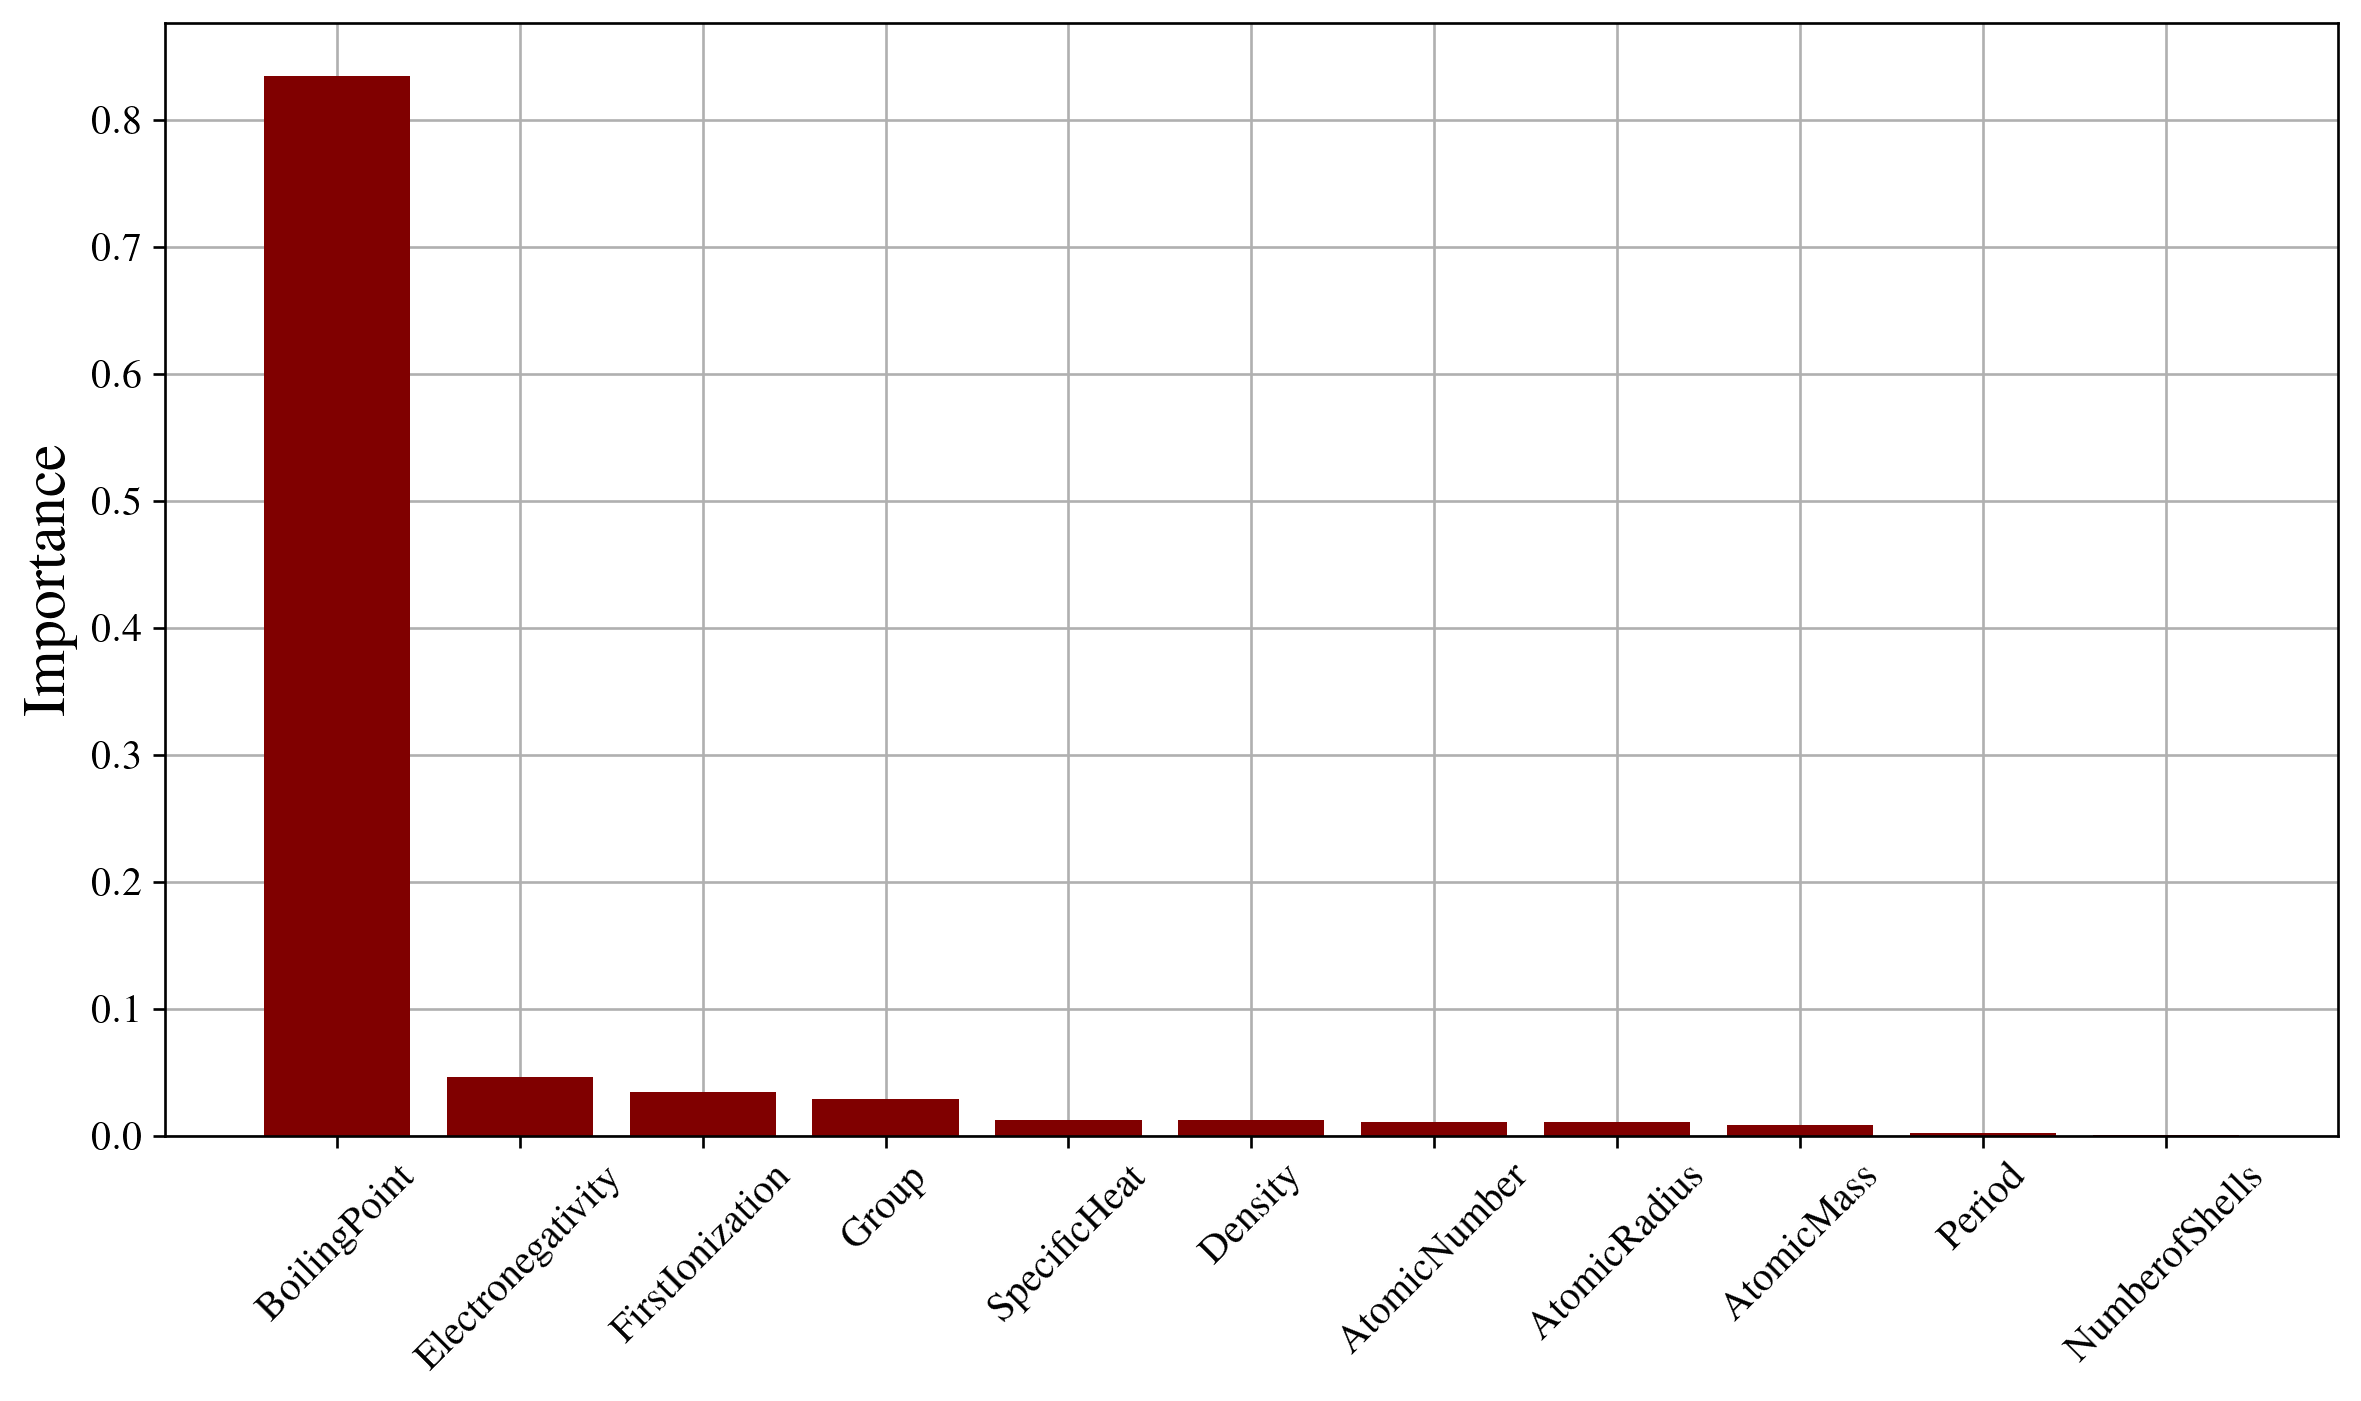

In [8]:
fig, ax = plt.subplots()
ax.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], zorder=2)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Importance')
plt.show()

The results show that the boiling point, electronegativity, and the first ionization have the highest effect on the model predicting the melting point. These results do physically make sense because the boiling point is closely related to the melting point. Generally, substances with a higher boiling point will also have higher melting points. Additionally, the electronegativity and first ionization characterize the bonding strength of the atom. This of course would affect the melting point.